In [1]:
library(dplyr)
library(ggplot2)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
glimpse(airquality)

Observations: 153
Variables: 6
$ Ozone   <int> 41, 36, 12, 18, NA, 28, 23, 19, 8, NA, 7, 16, 11, 14, 18, 14,…
$ Solar.R <int> 190, 118, 149, 313, NA, NA, 299, 99, 19, 194, NA, 256, 290, 2…
$ Wind    <dbl> 7.4, 8.0, 12.6, 11.5, 14.3, 14.9, 8.6, 13.8, 20.1, 8.6, 6.9, …
$ Temp    <int> 67, 72, 74, 62, 56, 66, 65, 59, 61, 69, 74, 69, 66, 68, 58, 6…
$ Month   <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5…
$ Day     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18…


In [3]:
data_air <- airquality %>%
select(-c(Solar.R, Temp)) %>%
mutate(Month = factor(Month, order = TRUE, 
                      labels = c("May", "June", "July", "August", "September")), 
day_cat = factor(ifelse(Day < 10, "Begin", ifelse(Day < 20, "Middle", "End"))))

In [4]:
glimpse(data_air)

Observations: 153
Variables: 5
$ Ozone   <int> 41, 36, 12, 18, NA, 28, 23, 19, 8, NA, 7, 16, 11, 14, 18, 14,…
$ Wind    <dbl> 7.4, 8.0, 12.6, 11.5, 14.3, 14.9, 8.6, 13.8, 20.1, 8.6, 6.9, …
$ Month   <ord> May, May, May, May, May, May, May, May, May, May, May, May, M…
$ Day     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18…
$ day_cat <fct> Begin, Begin, Begin, Begin, Begin, Begin, Begin, Begin, Begin…


In [5]:
data_air_nona <-data_air %>% na.omit()

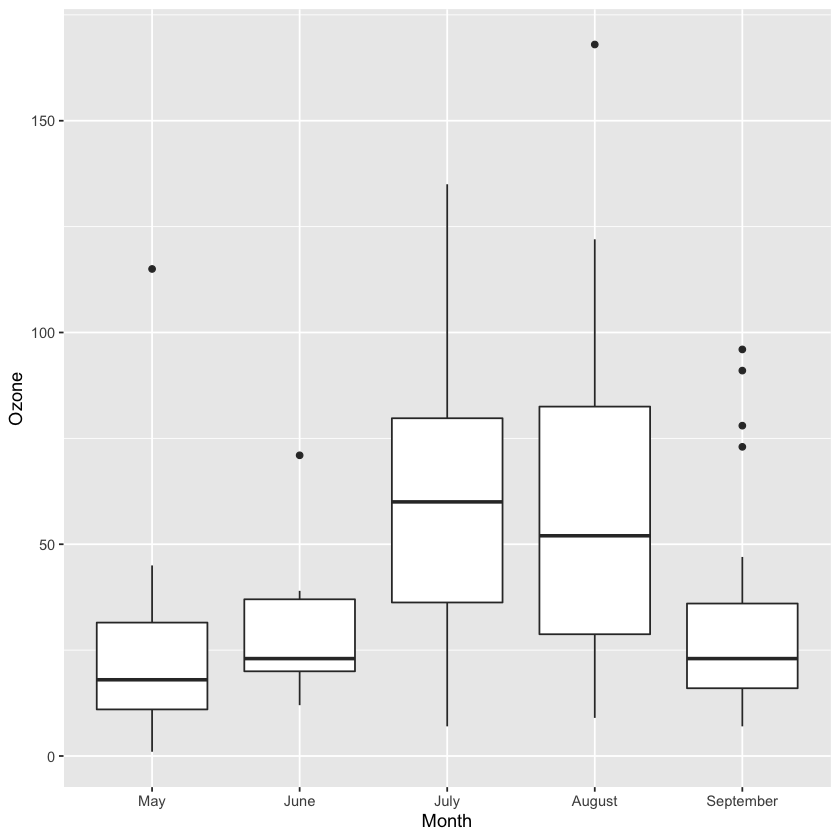

In [6]:
box_plot <- ggplot(data_air_nona, aes(x = Month, y = Ozone))
# Add the geometric object box plot
box_plot +
    geom_boxplot()

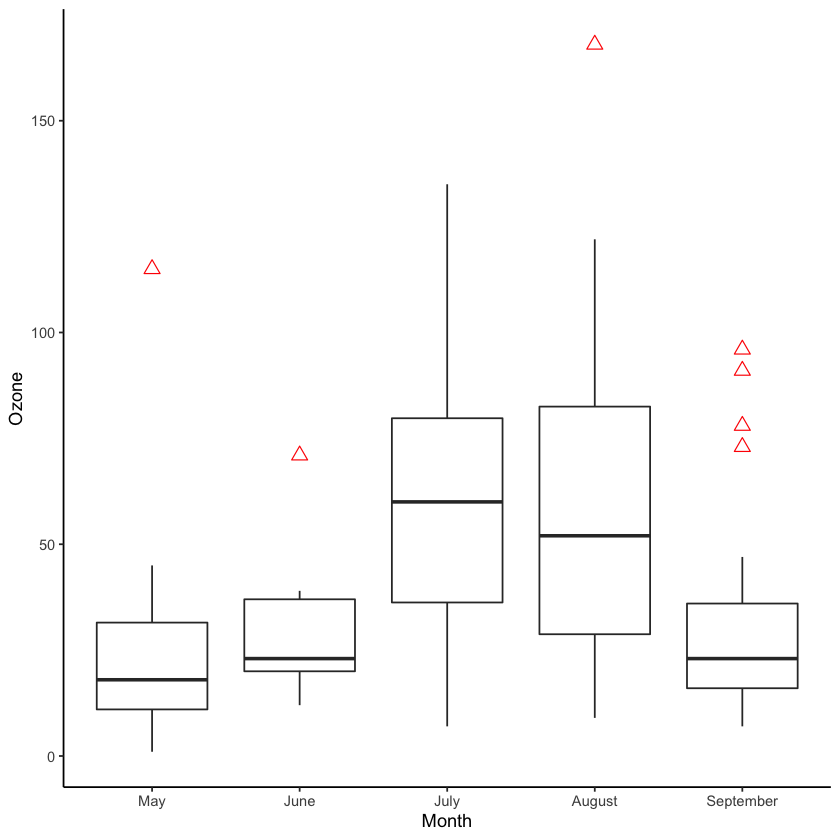

In [7]:
#  coloured outlier
box_plot +
     geom_boxplot(outlier.colour = "red",
        outlier.shape = 2,
        outlier.size = 3) +
    theme_classic()

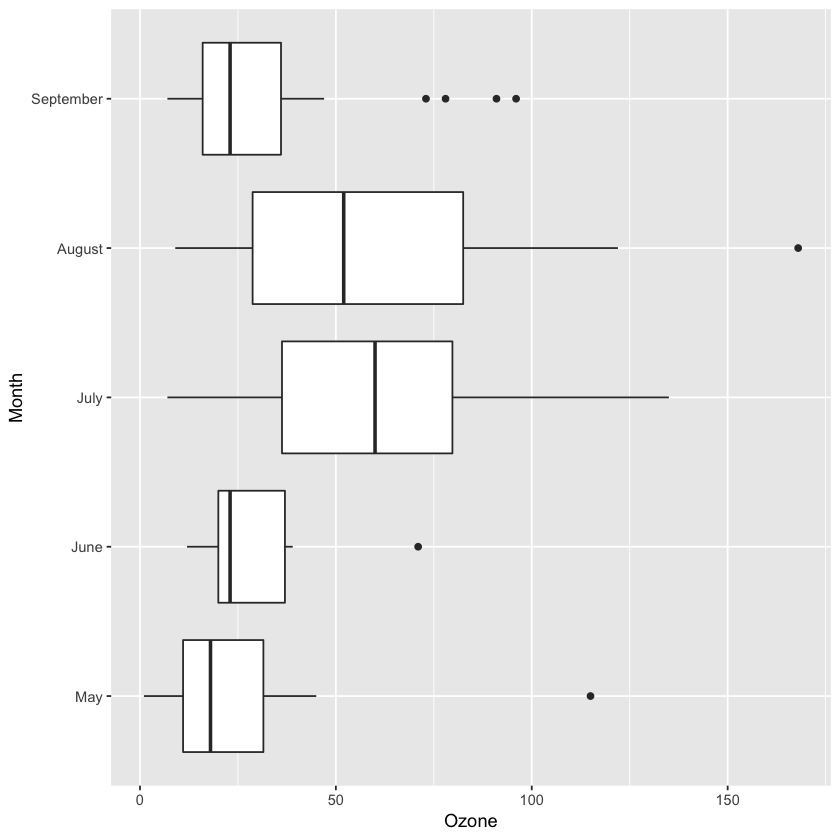

In [22]:
# flipped boxplot
box_plot +
  geom_boxplot()+
  coord_flip()

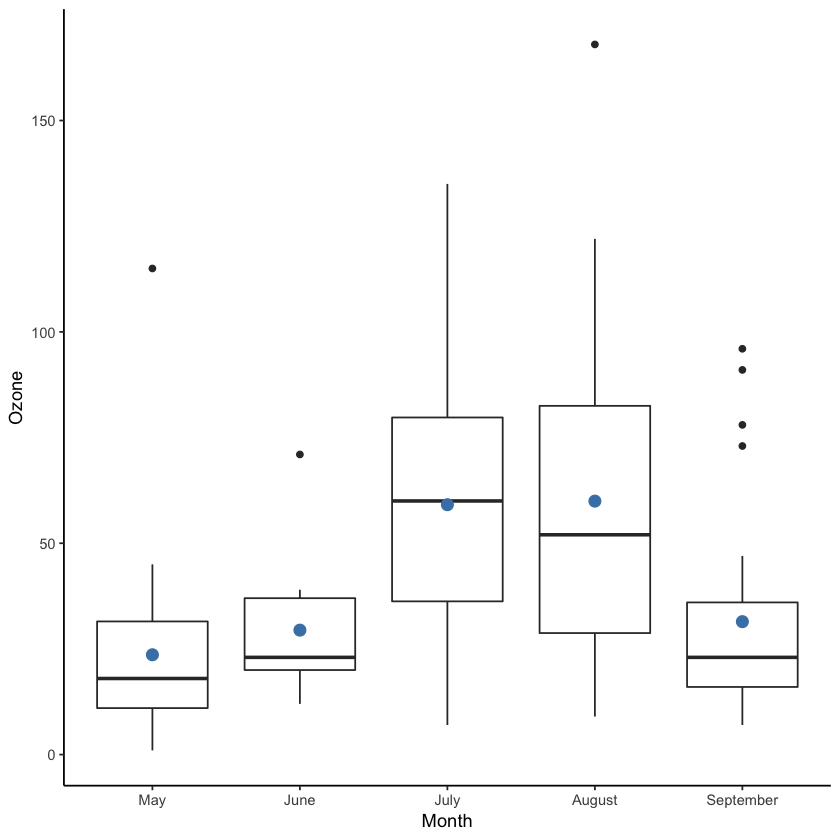

In [23]:
# summary sttatistics, adding the mean value
box_plot +
    geom_boxplot() +
    stat_summary(fun.y = mean,
        geom = "point",
        size = 3,
        color = "steelblue") +
    theme_classic()

Warning message:
“Removed 37 rows containing non-finite values (stat_boxplot).”

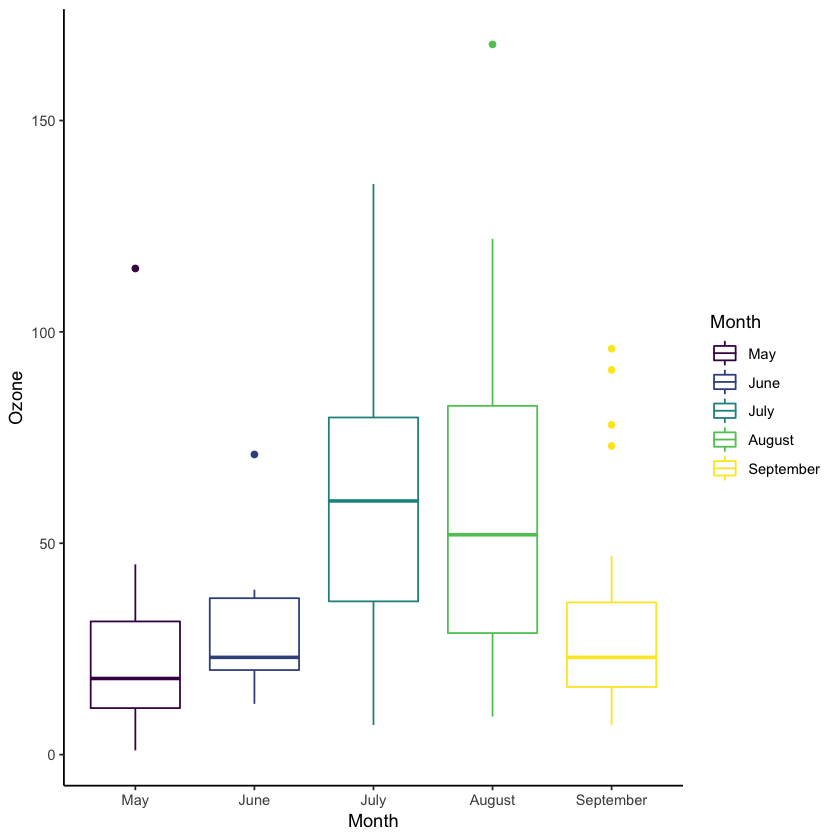

In [27]:
ggplot(data_air, aes(x = Month, y = Ozone, color = Month)) +
    geom_boxplot() +
    theme_classic()

Warning message:
“Removed 37 rows containing non-finite values (stat_boxplot).”

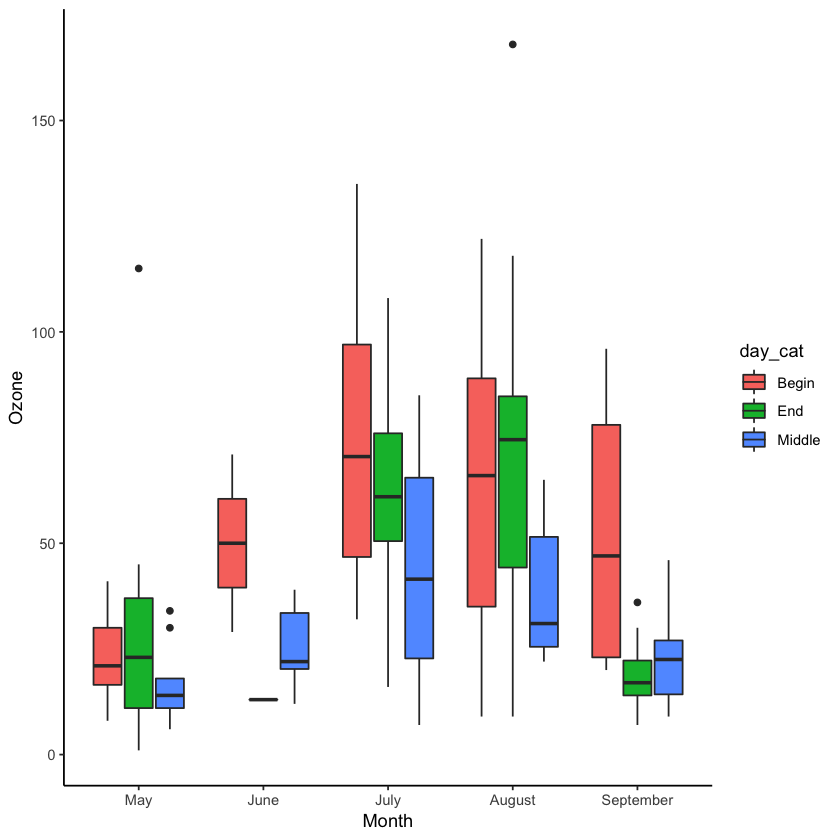

In [28]:
ggplot(data_air, aes(Month, Ozone)) +
    geom_boxplot(aes(fill = day_cat)) +
    theme_classic()

In [45]:
data("ChickWeight")

In [47]:
glimpse(ChickWeight)

Observations: 578
Variables: 4
$ weight <dbl> 42, 51, 59, 64, 76, 93, 106, 125, 149, 171, 199, 205, 40, 49, …
$ Time   <dbl> 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 21, 0, 2, 4, 6, 8, 10, …
$ Chick  <ord> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ Diet   <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…


In [48]:
str(ChickWeight)

Classes ‘nfnGroupedData’, ‘nfGroupedData’, ‘groupedData’ and 'data.frame':	578 obs. of  4 variables:
 $ weight: num  42 51 59 64 76 93 106 125 149 171 ...
 $ Time  : num  0 2 4 6 8 10 12 14 16 18 ...
 $ Chick : Ord.factor w/ 50 levels "18"<"16"<"15"<..: 15 15 15 15 15 15 15 15 15 15 ...
 $ Diet  : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "formula")=Class 'formula'  language weight ~ Time | Chick
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "outer")=Class 'formula'  language ~Diet
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "labels")=List of 2
  ..$ x: chr "Time"
  ..$ y: chr "Body weight"
 - attr(*, "units")=List of 2
  ..$ x: chr "(days)"
  ..$ y: chr "(gm)"


In [49]:
head(ChickWeight)

weight,Time,Chick,Diet
42,0,1,1
51,2,1,1
59,4,1,1
64,6,1,1
76,8,1,1
93,10,1,1


In [50]:
?ChickWeight

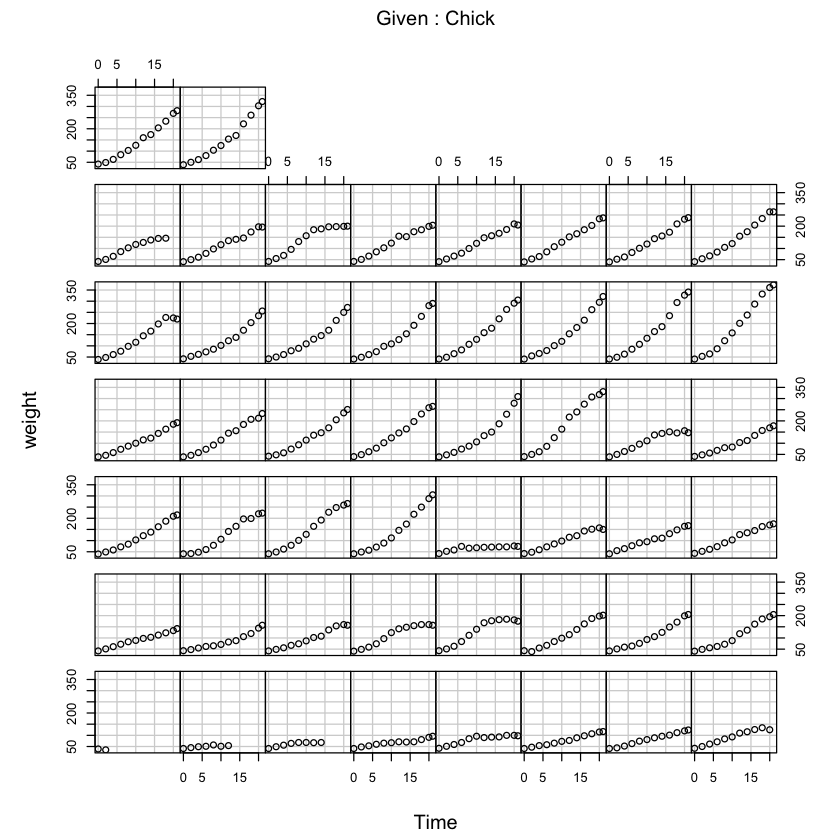

In [51]:
require(graphics)
coplot(weight ~ Time | Chick, data = ChickWeight,
       type = "b", show.given = FALSE)

In [59]:
#  Sorting cars my mpg
head(mtcars[order(mtcars$mpg, decreasing =T), ])

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2


### Scatterplot with coord_trans()

In [2]:
ggplot(data = mammals, aes(x = BodyWt, y = BrainWt)) +
  geom_point() + 
  coord_trans(x = "log10", y = "log10")

ERROR: Error in ggplot(data = mammals, aes(x = BodyWt, y = BrainWt)): could not find function "ggplot"


In [3]:
x <- c("single", "married", "married", "single")

In [5]:
factor(x)

[1] single  married married single 
Levels: married single

In [7]:
level(x)

ERROR: Error in level(x): could not find function "level"


In [4]:
(x<-factor(x))

[1] single  married married single 
Levels: married single

In [12]:
(x[2]<- "single")

[1] "single"

Warning message in `[<-.factor`(`*tmp*`, 2, value = "divorced"):
“invalid factor level, NA generated”

[1] "divorced"

In [ ]:
x[3] <- "widowed"

In [14]:
x

[1] single  <NA>    married single 
Levels: married single

In [15]:
factor(x) <- c(levels(x), "widowed")
x[3] <- "widowed"
x

[1] single  <NA>    widowed single 
Levels: married single widowed

(Data cleaning)[#Data cleaning]

In [ ]:
help(NA)
is.na(dt)
sum(is.na(dt))
mean(is.na(dt))
dt$Age[dt$Age == 99] <- NA
na.omit(dt)

In [53]:
library(dplyr)
class(mtcars %>%
    distinct( vs))

[1] "data.frame"

In [54]:
class(unique(mtcars$vs))

[1] "numeric"

In [ ]:
install.packages('broom')
library(broom)
library(dplyr)
d<-mtcars %>%
    augment() %>% head()

In [ ]:
ggplot(d, aes(x = hp, y = mpg)) +
  geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +
  geom_segment(aes(xend = hp, yend = .fitted), alpha = .2) +  # Note `.fitted`
  geom_point(aes(alpha = abs(.resid))) +  # Note `.resid`
  guides(alpha = FALSE) +
  geom_point(aes(y = .fitted), shape = 1) +  # Note `.fitted`
  theme_bw()